Loading images: 100%|██████████| 50000/50000 [00:17<00:00, 2917.07it/s]


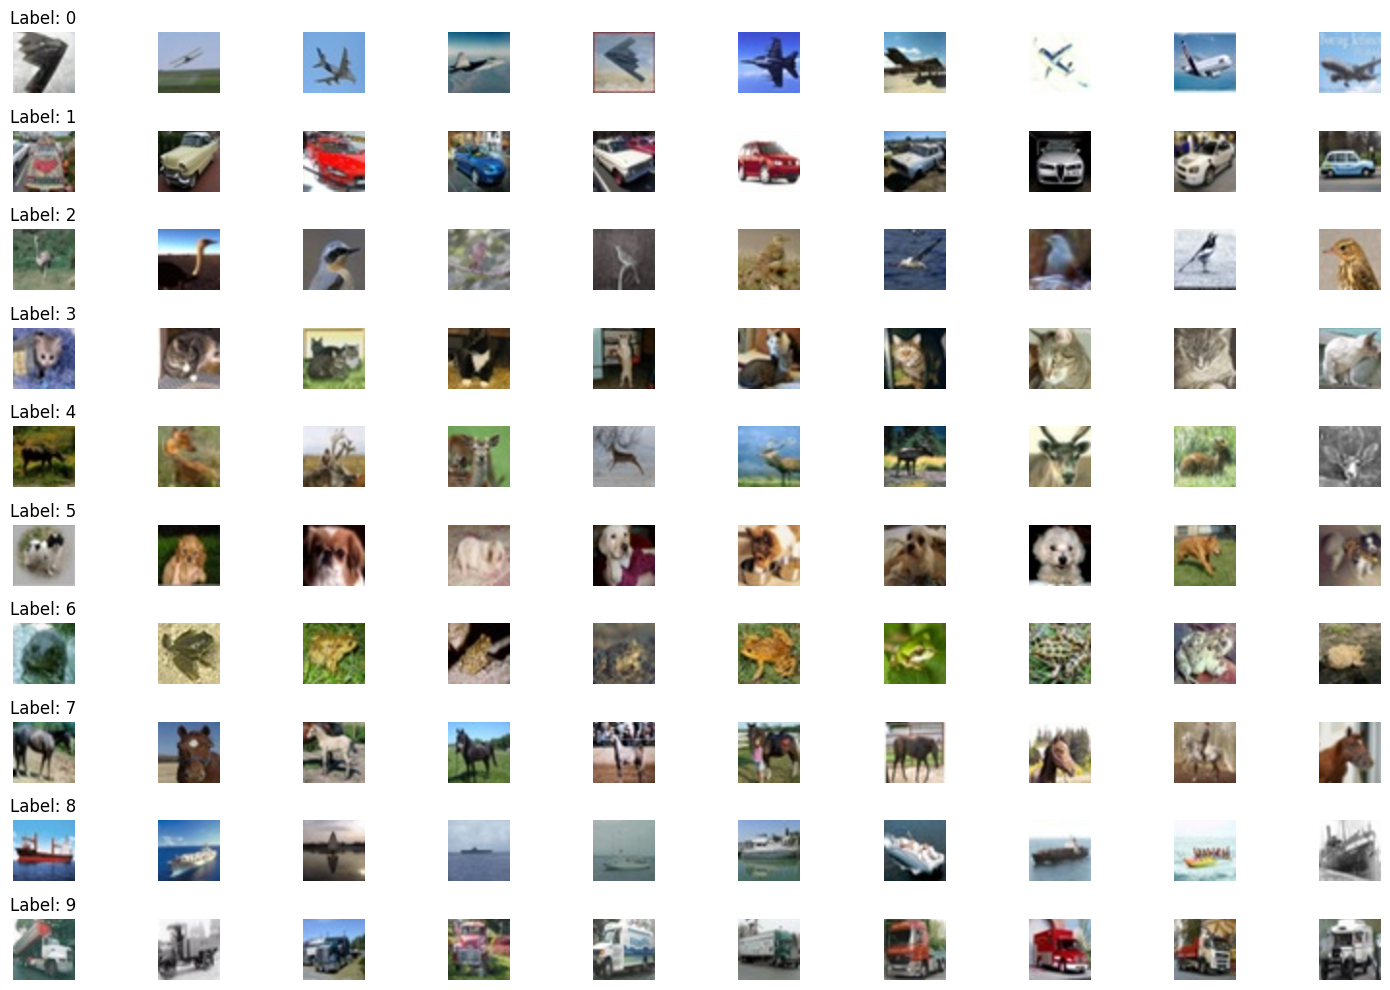

Number of samples per category:
label
2    5038
8    5020
1    5012
0    5010
3    5007
7    5000
4    4995
5    4993
9    4970
6    4955
Name: count, dtype: int64


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from tqdm import tqdm

# Define the base directory
base_dir = "/Users/zhao0725/Desktop/COMP3314/Assignment3/image-classification-challenge"

# Paths relative to the base directory
train_csv_path = os.path.join(base_dir, "train.csv")
train_images_folder = os.path.join(base_dir, "train_ims")
test_images_folder = os.path.join(base_dir, "test_ims")
test_csv_path = os.path.join(base_dir, "test.csv")

# Load training labels
train_csv = pd.read_csv(train_csv_path)

# Load images into arrays using Pillow
def load_images(image_folder, image_ids, img_size=(64, 64)):
    images = []
    for image_id in tqdm(image_ids, desc="Loading images"):
        img_path = os.path.join(image_folder, image_id)
        try:
            # Open the image, resize it, and flatten into a 1D array
            img = Image.open(img_path).resize(img_size)
            img_array = np.array(img).flatten()
            images.append(img_array)
        except Exception as e:
            print(f"Error loading image {image_id}: {e}")
    return np.array(images)

# Prepare training data
X_train_images = load_images(train_images_folder, train_csv['im_name'])
y_train = train_csv['label']

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Set up the number of images to display per label
num_images_per_label = 10

# Get the unique labels
unique_labels = np.unique(y_train_encoded)

# Set up the figure size
plt.figure(figsize=(15, 10))

# Loop through each label
for label in unique_labels:
    # Get the indices of all images with the current label
    indices = np.where(y_train_encoded == label)[0][:num_images_per_label]
    
    # Loop through the selected images
    for i, idx in enumerate(indices):
        # Calculate subplot index
        subplot_idx = label * num_images_per_label + i + 1
        
        # Reshape the image (assuming it's 64x64)
        img = X_train_images[idx].reshape(64, 64, -1)  # Adjust if images are colored
        
        # Plot the image
        plt.subplot(len(unique_labels), num_images_per_label, subplot_idx)
        plt.imshow(img, cmap='gray')  # Use cmap='gray' for grayscale
        plt.axis('off')
        
        # Add a title only to the first row
        if i == 0:
            plt.title(f"Label: {label}")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Count the occurrences of each label
category_counts = train_csv['label'].value_counts()

# Display the counts for each category
print("Number of samples per category:")
print(category_counts)

# Optional: Convert to a dictionary
category_counts_dict = category_counts.to_dict()


